In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [3]:
movies.shape

(979, 6)

In [4]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [5]:
movies.content_rating.isnull().sum()

3

In [6]:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [7]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [13]:
movies[movies.content_rating == 'NOT RATED'].content_rating

5      NOT RATED
6      NOT RATED
41     NOT RATED
63     NOT RATED
66     NOT RATED
         ...    
665    NOT RATED
673    NOT RATED
763    NOT RATED
827    NOT RATED
899    NOT RATED
Name: content_rating, Length: 65, dtype: object

In [14]:
len(movies[movies.content_rating == 'NOT RATED'].content_rating)  # to get it in the form of the series

65

In [15]:
movies[movies.content_rating == 'NOT RATED'].content_rating = np.nan

C:\Users\mynam\AppData\Roaming\Python\Python310\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
movies.content_rating.isnull().sum() 

3

In [20]:
# inorder to make it work we have to use the loc function
movies.loc[movies.content_rating == 'NOT RATED','content_rating'] = np.nan

In [18]:
movies.content_rating.isnull().sum() 

68

In [ ]:
# what is happening here is that [movies.content_rating == 'NOT RATED']  is the get part and
# content_rating = np.nan  and this is the set part 
# now the pandas cant garuntee that the get part is a view mode or an copy of that part from the dataframe 
# therefore if it is in the view mode set part becomes invalid and even if is in the copy mode it just 
# discard it 
# loc trun it into a new dataframe

# Categorical Data Pe kya kya chala sakte he univariate analysis karte vakt
### pie chart 
### count plot

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre', ylabel='count'>

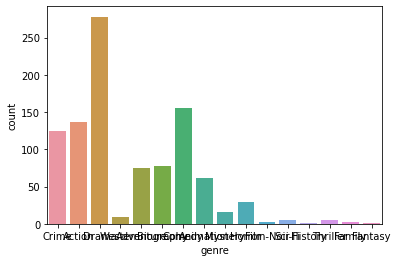

In [23]:
sns.countplot(movies['genre'],)

# numerical data me kya kya chala sakte h 
### Histogram
### displot 
### box plot

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 49., 108., 124., 113.,   0., 116.,  75.,  97.,   0., 103.,  51.,
         43.,   0.,  37.,  23.,  15.,   0.,  10.,   5.,   6.,   0.,   1.,
          1.,   1.,   1.]),
 array([7.4  , 7.476, 7.552, 7.628, 7.704, 7.78 , 7.856, 7.932, 8.008,
        8.084, 8.16 , 8.236, 8.312, 8.388, 8.464, 8.54 , 8.616, 8.692,
        8.768, 8.844, 8.92 , 8.996, 9.072, 9.148, 9.224, 9.3  ]),
 <BarContainer object of 25 artists>)

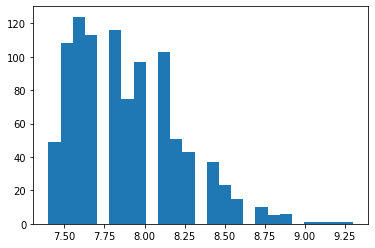

In [36]:
# Histogram # numerical daata ko categorical ki tarah use karva sakte ho
plt.hist(movies['star_rating'],bins=25)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='star_rating', ylabel='Density'>

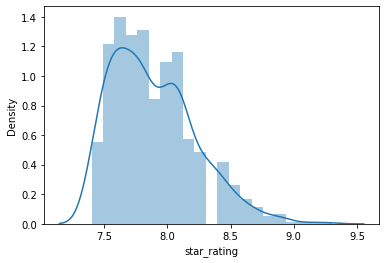

In [35]:
# distplot  # vo line ko bolte he kernel density estimator
# isko pdf bolte he probablity density function  # y pe probablity he aur x axis pe value 
# ki ek movie ko uthae aur puche ki uske rating ka 7.5 hone ka probablity kitna he 
sns.distplot(movies['star_rating'],bins=21)

In [ ]:
# Boxplot # 5 no. summary

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='star_rating'>

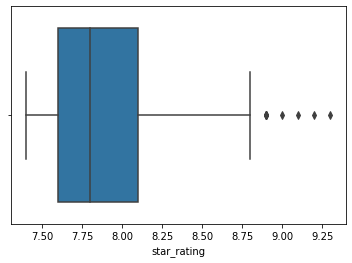

In [37]:
sns.boxplot(movies['star_rating'])